In [37]:
import numpy as np
import random
from keras import layers,regularizers,optimizers,callbacks
from keras.layers import Input,ZeroPadding2D,Conv2D,Activation,BatchNormalization,Flatten,Dense,Dropout,MaxPooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [76]:
def load_dataset():
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    
    for i in range(1,1500): 
        train_path = "dataset/training_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(0)
    for i in range(1,1500): 
        train_path = "dataset/training_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(1)
    for i in range(4001,4500): 
        train_path = "dataset/test_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(0)
    for i in range(4001,4500): 
        train_path = "dataset/test_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(1)
   
    np.random.seed(0)
    permutation = list(np.random.permutation(8000))
    train_x = np.squeeze(np.array(train_X))
    test_x = np.squeeze(np.array(test_X))
    train_y = np.squeeze(np.array(train_Y))
    test_y = np.squeeze(np.array(test_Y))
    print("Training images shape::::",train_x.shape)
    print("Training labels shape::::",train_y.shape)
    print("Test images shape::::",test_x.shape)
    print("Test labels shape::::",test_y.shape)    
    plt.imshow(train_x[273])
    print(train_y[273])
    return train_x,train_y,test_x,test_y

In [77]:
l2 = regularizers.l2(0.00020)
model = Sequential()
model.add(Conv2D(32,(3,3),strides = (1,1),input_shape = (64,64,3),name = "Conv_1",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_1"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),strides = (1,1),name = "Conv_2",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_2"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(128,(3,3),strides = (1,1),name = "Conv_3",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_3"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2))
          
model.add(Flatten())
model.add(Dense(512,activation = "relu", name = "Dense_1", kernel_regularizer=l2,kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#model.add(Dense(128,activation = "relu", name = "Dense_2", kernel_initializer='he_uniform'))
model.add(Dense(1,activation = "sigmoid", name = "Dense_3"))
    

In [78]:
class mycallback(callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if( logs.get('accuracy') > 0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
callback = mycallback()            
    

Training images shape:::: (2998, 64, 64, 3)
Training labels shape:::: (2998,)
Test images shape:::: (998, 64, 64, 3)
Test labels shape:::: (998,)
0


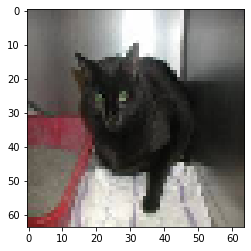

In [79]:
train_X,train_Y,test_X,test_Y = load_dataset()

Training images shape:::: (2998, 64, 64, 3)
Training labels shape:::: (2998,)
Test images shape:::: (998, 64, 64, 3)
Test labels shape:::: (998,)
0


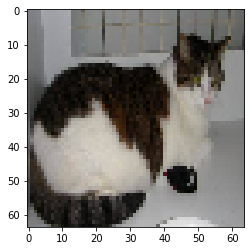

In [80]:
p = np.random.permutation(2998)
train_x = train_X[p]
train_y = train_Y[p]
p = np.random.permutation(998)
test_x = test_X[p]
test_y = test_Y[p]
print("Training images shape::::",train_x.shape)
print("Training labels shape::::",train_y.shape)
print("Test images shape::::",test_x.shape)
print("Test labels shape::::",test_y.shape)
print(train_Y[1234])
plt.imshow(train_X[1234])

In [81]:
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [107]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [109]:
history = model.fit(aug.flow(train_x,train_y,batch_size = 32),validation_data=(test_x[:500],test_y[:500]),epochs=250,callbacks = [callback])

Epoch 1/250
94/94 [==============================] - 44s 469ms/step - loss: 0.4349 - accuracy: 0.8482 - val_loss: 0.6751 - val_accuracy: 0.7780
Epoch 2/250
94/94 [==============================] - 50s 534ms/step - loss: 0.4376 - accuracy: 0.8539 - val_loss: 0.6791 - val_accuracy: 0.7680
Epoch 3/250
94/94 [==============================] - 45s 479ms/step - loss: 0.4319 - accuracy: 0.8566 - val_loss: 0.5744 - val_accuracy: 0.7940
Epoch 4/250
94/94 [==============================] - 45s 483ms/step - loss: 0.4329 - accuracy: 0.8549 - val_loss: 0.9450 - val_accuracy: 0.6740
Epoch 5/250
94/94 [==============================] - 46s 489ms/step - loss: 0.4318 - accuracy: 0.8612 - val_loss: 0.4236 - val_accuracy: 0.8680
Epoch 6/250
94/94 [==============================] - 45s 474ms/step - loss: 0.4344 - accuracy: 0.8529 - val_loss: 0.5289 - val_accuracy: 0.8140
Epoch 7/250
94/94 [==============================] - 45s 484ms/step - loss: 0.4407 - accuracy: 0.8539 - val_loss: 0.4373 - val_accuracy:

94/94 [==============================] - 47s 498ms/step - loss: 0.4322 - accuracy: 0.8576 - val_loss: 0.5070 - val_accuracy: 0.8440
Epoch 58/250
94/94 [==============================] - 45s 475ms/step - loss: 0.4132 - accuracy: 0.8736 - val_loss: 0.4304 - val_accuracy: 0.8760
Epoch 59/250
94/94 [==============================] - 44s 470ms/step - loss: 0.4172 - accuracy: 0.8649 - val_loss: 0.4623 - val_accuracy: 0.8660
Epoch 60/250
94/94 [==============================] - 47s 497ms/step - loss: 0.4144 - accuracy: 0.8753 - val_loss: 0.4830 - val_accuracy: 0.8480
Epoch 61/250
94/94 [==============================] - 46s 494ms/step - loss: 0.4243 - accuracy: 0.8702 - val_loss: 0.5791 - val_accuracy: 0.8420
Epoch 62/250
94/94 [==============================] - 44s 471ms/step - loss: 0.4231 - accuracy: 0.8712 - val_loss: 0.6552 - val_accuracy: 0.7460
Epoch 63/250
94/94 [==============================] - 47s 499ms/step - loss: 0.4198 - accuracy: 0.8756 - val_loss: 0.6391 - val_accuracy: 0.798

94/94 [==============================] - 45s 480ms/step - loss: 0.4038 - accuracy: 0.8863 - val_loss: 0.4669 - val_accuracy: 0.8520
Epoch 114/250
94/94 [==============================] - 48s 514ms/step - loss: 0.3986 - accuracy: 0.8869 - val_loss: 0.5036 - val_accuracy: 0.8360
Epoch 115/250
94/94 [==============================] - 44s 473ms/step - loss: 0.4128 - accuracy: 0.8803 - val_loss: 0.4305 - val_accuracy: 0.8900
Epoch 116/250
94/94 [==============================] - 47s 500ms/step - loss: 0.4002 - accuracy: 0.8859 - val_loss: 0.7067 - val_accuracy: 0.7600
Epoch 117/250
94/94 [==============================] - 46s 489ms/step - loss: 0.4009 - accuracy: 0.8759 - val_loss: 0.5951 - val_accuracy: 0.8240
Epoch 118/250
94/94 [==============================] - 42s 449ms/step - loss: 0.4166 - accuracy: 0.8783 - val_loss: 0.5318 - val_accuracy: 0.8500
Epoch 119/250
94/94 [==============================] - 47s 504ms/step - loss: 0.4052 - accuracy: 0.8816 - val_loss: 0.4706 - val_accuracy:

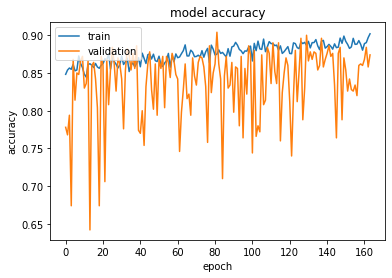

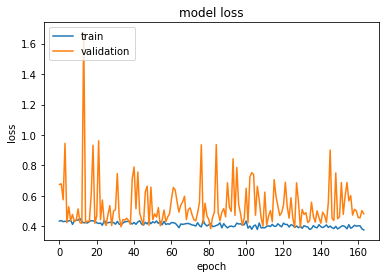

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = "upper left")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = "upper left")
plt.show()

(1, 64, 64, 3)
[[1.]]


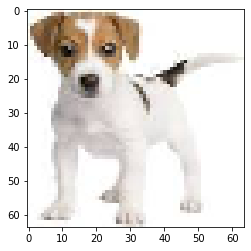

In [124]:
import cv2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
#img = cv2.imread("images/download.jpg")
img_path = 'images/download.jpg'
img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

print(np.floor(model.predict(x)))